Importing the necessary packages:

In [1]:
import numpy as np
import csv
from csv import DictReader
import collections
from math import sqrt
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
traindata='/content/drive/My Drive/Big Data Analytics/Project 4/training_dataset.csv'
testdata='/content/drive/My Drive/Big Data Analytics/Project 4/test_dataset.csv'

Function to calculate the RMSE:

In [36]:
def RMSE(y_actual, y_predicted):
  rms = sqrt(mean_squared_error(y_actual, y_predicted))
  return round(rms,4)

Reading the training and test datasets:

In [4]:
with open(traindata, 'r') as train:
  tr_file = list(csv.reader(train))[1:]
with open(testdata, 'r') as test:
  tst_file = list(csv.reader(test))[1:]

Function to implement the Latent Factor Model:

In [65]:
# Function that uses the Latent Factor Model to make recommendations
# Parameters:
# 1. factors: number of factors to be used when decomposing the R matrix
# 2. l: lambda parameter for regularization
# 3. m: mu, the learning rate for the algorithm
# 4. iter: the number of iterations
# The function returns the list of RMSEs at every iteration of the algorithm
def lfm(factors, l, m, iter):
  # Assigning values to respective variables
  k = factors
  lam = l
  mu = m
  iterations = iter
  # M and N are the number of movies and the number of users in the training file
  # respectively
  m = max([int(x[1]) for x in tr_file]) 
  n = max([int(x[0]) for x in tr_file]) 
  # Initialized two matrices, p & q:
  # 1. Q = m x k matrix of movies and factors, with all elements initialized to 
  #    a random value in the range [0, (5/k)^1/2]
  # 2. P = n x k matrix of users and factors, with all elements initialized to 
  #    a random value in the range [0, (5/k)^1/2]
  q = np.array([[random.uniform(0,sqrt(5/k)) for i in range(k)] for j in range(m)], dtype=np.float128)
  p = np.array([[random.uniform(0,sqrt(5/k)) for i in range(k)] for j in range(n)], dtype=np.float128)
  # list of RMSEs that will be plotted later
  rmses = []
  # Run for the number of specified iterations
  for it in range(iterations):
    # Iterating through every line of the training file to get the rating, using which the 
    # p and q matrices will be optimized
    for line in tr_file:
      # The rating for user x and movie i will be stored at position [(x-1),[i-1]]
      x = int(line[0]) - 1
      i = int(line[1]) - 1
      r = float(line[2])
      # The matrices p and q are optimised using stochastic gradient descent
      # The minimum of the function is calculated by calulating the derivative of the 
      # error function
      eps = 2*(r - np.dot(q[i],p[x]))
      # Optimized using the regularization
      q[i] += mu*(eps*p[x] - lam*q[i])
      p[x] += mu*(eps*q[i] - lam*p[x])
    actual = []
    preds = []
    # Iterating through the test file to calculate the RMSEs by using the actual 
    # and predicted values. The dot product of each row from the p and q 
    # matrices that were optimised using the stochastic gradient descent method
    for line in tst_file:
      x = int(line[0]) - 1
      i = int(line[1]) - 1
      r = float(line[2])
      actual.append(r)
      # The dot product of the row from p and q matrices gives the predicted 
      # rating of a user for a movie
      preds.append(np.dot(q[i],p[x]))
    rmses.append(RMSE(actual, preds))
  return rmses

Using the LFM recommendation system with 25 factors, regularization parameter (lambda) of 0.1, a learning rate (mu) of 0.01 and 40 iterations:

In [99]:
rmses = lfm(25, 0.1, 0.01, 40)

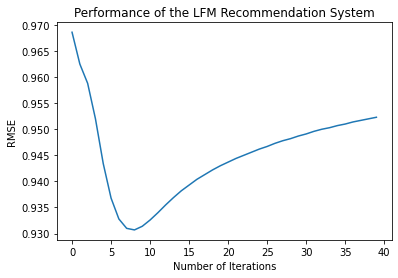

In [100]:
plt.title('Performance of the LFM Recommendation System')
plt.xlabel('Number of Iterations')
plt.ylabel('RMSE')
plt.plot(rmses)

Using the LFM recommendation system with 40 factors, regularization parameter (lambda) of 0.1, a learning rate (mu) of 0.001 and 60 iterations:

In [96]:
rmses = lfm(40, 0.1, 0.001, 60)

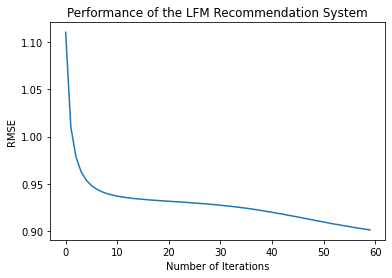

In [97]:
plt.title('Performance of the LFM Recommendation System')
plt.xlabel('Number of Iterations')
plt.ylabel('RMSE')
plt.plot(rmses)

In [98]:
min(rmses)

0.901

_____

Latent Factor Modeling – Sugandhi Akula
* Loading data into Python
* Importing necessary packages
* Initializing the matrices P and Q
* Defining the logic for optimizing P and Q – SGD, Regularization
* Calculating Sum of Squares Error at each iteration
* Plotting the SSEs
* Calculating the RMSE
* Hyperparameter tuning to lower the RMSE

____________________________

____________________________

**Compare & Contrast Models:** Sugandhi Akula, Rushya Puttam
**Teamwork Documentation:** Sugandhi Akula, Rushya Puttam

**Model Comparison and Contrast**

*Model |	Model Name |	RMSE*

Model 1	| Collaborative Item-Item Filtering with Cosine as similarity Metric |	1.0086

Model 2 |	Collaborative Item-Item Filtering with Adjusted Cosine as similarity Metric |	0.9135

Model 3	| Latent Factor Modeling	| 0.9

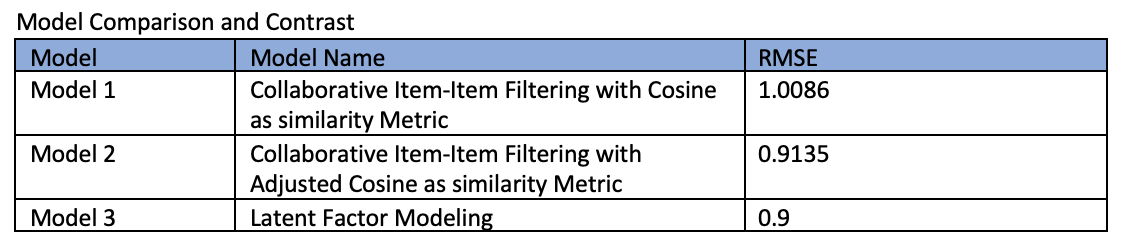

**In Collaborative Item-Item Filtering with Cosine as similarity Metric**, the user ratings are not considered while getting the similarity score. Hence, we are not doing any normalization and hence the similarity scores are not that accurate. As a result, RMSE for this model is slightly greater than 1.

**In Collaborative Item-Item Filtering with Adjusted Cosine as similarity metric**, the user ratings are centered and normalized before going for the calculation of distance. This makes sense as different users rate a single movie in different ways. Some users usually give higher ratings while some users give lower ratings hence this similarity metric has better results. Finally, this model RMSE is 0.9135 and it is lower than the previous model.

**In Latent Factor Model**, two matrices PT and Q are introduced. The rating for each row in dataset is nothing but the dot product of these two matrices. Here our objective is to reduce the error, i.e., RMSE. If we consider the P, Q and the rating to be predicted, as a function of error, mathematically we have to calculate the first derivative and find its roots. Then at each of these points, the min value of function can be obtained by substituting these roots. This is nothing but Stochastic Gradient Descent, where a random point is assumed on graph and a value is calculated. Following this, to find the minimum value, we move in the opposite direction until convergence is obtained. This is where we get the minimum point. But to avoid overfitting, parameters lambda and learning rate can be adjusted. This is nothing but regularization. As we have a choice of giving different values for parameters and iterations to keep updating PT and Q matrices, this model has even lower RMSE than the other two models.

Results
Finally, model 1 does not consider any centering, model 2 considers centering while calculating the similarity scores and model 3 is altogether different approach and it has many flexible methods(like learning parameters, regularization, matrices updates by iterating) to keep adjusting the model until we get a satisfactory RMSE. Hence, this is more efficient model.

In terms of efficiency
Model 3 > Model 2> Model 1
